# Linear Models

In [38]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="notebook", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from common.data import get_data

X, y, ages = get_data()

selected_measure = "WISC_FSIQ"
y = np.array(y[selected_measure])

print("X shape:", X.shape, "y shape:", y.shape)

X shape: (678, 34716) y shape: (678,)


## Dimensionality Reduction
I'm following the guide here: <https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html>.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X, y)

pls = PLSRegression(n_components=1)
pls.fit(X, y)

PLSRegression(n_components=1)

In [5]:
pca = pcr.named_steps['pca']
X_pca = pca.transform(X)

print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
print(pca.components_.shape)
print(X_pca.shape)

X_pls = pls.transform(X)
print(X_pls.shape)

[0.21423237] 0.21423237
(1, 34716)
(678, 1)
(678, 1)


In [6]:
reg = pcr.named_steps['linearregression']
y_pcr_pred = reg.predict(X_pca)
y_pls_pred = pls.predict(X)

print("PCR Coef:", reg.coef_)
print("PCR r^2:", reg.score(X_pca, y))
print("PLS r^2:", pls.score(X, y))

PCR Coef: [-0.01800267]
PCR r^2: 0.0019993722500274425
PLS r^2: 0.04059274102533428


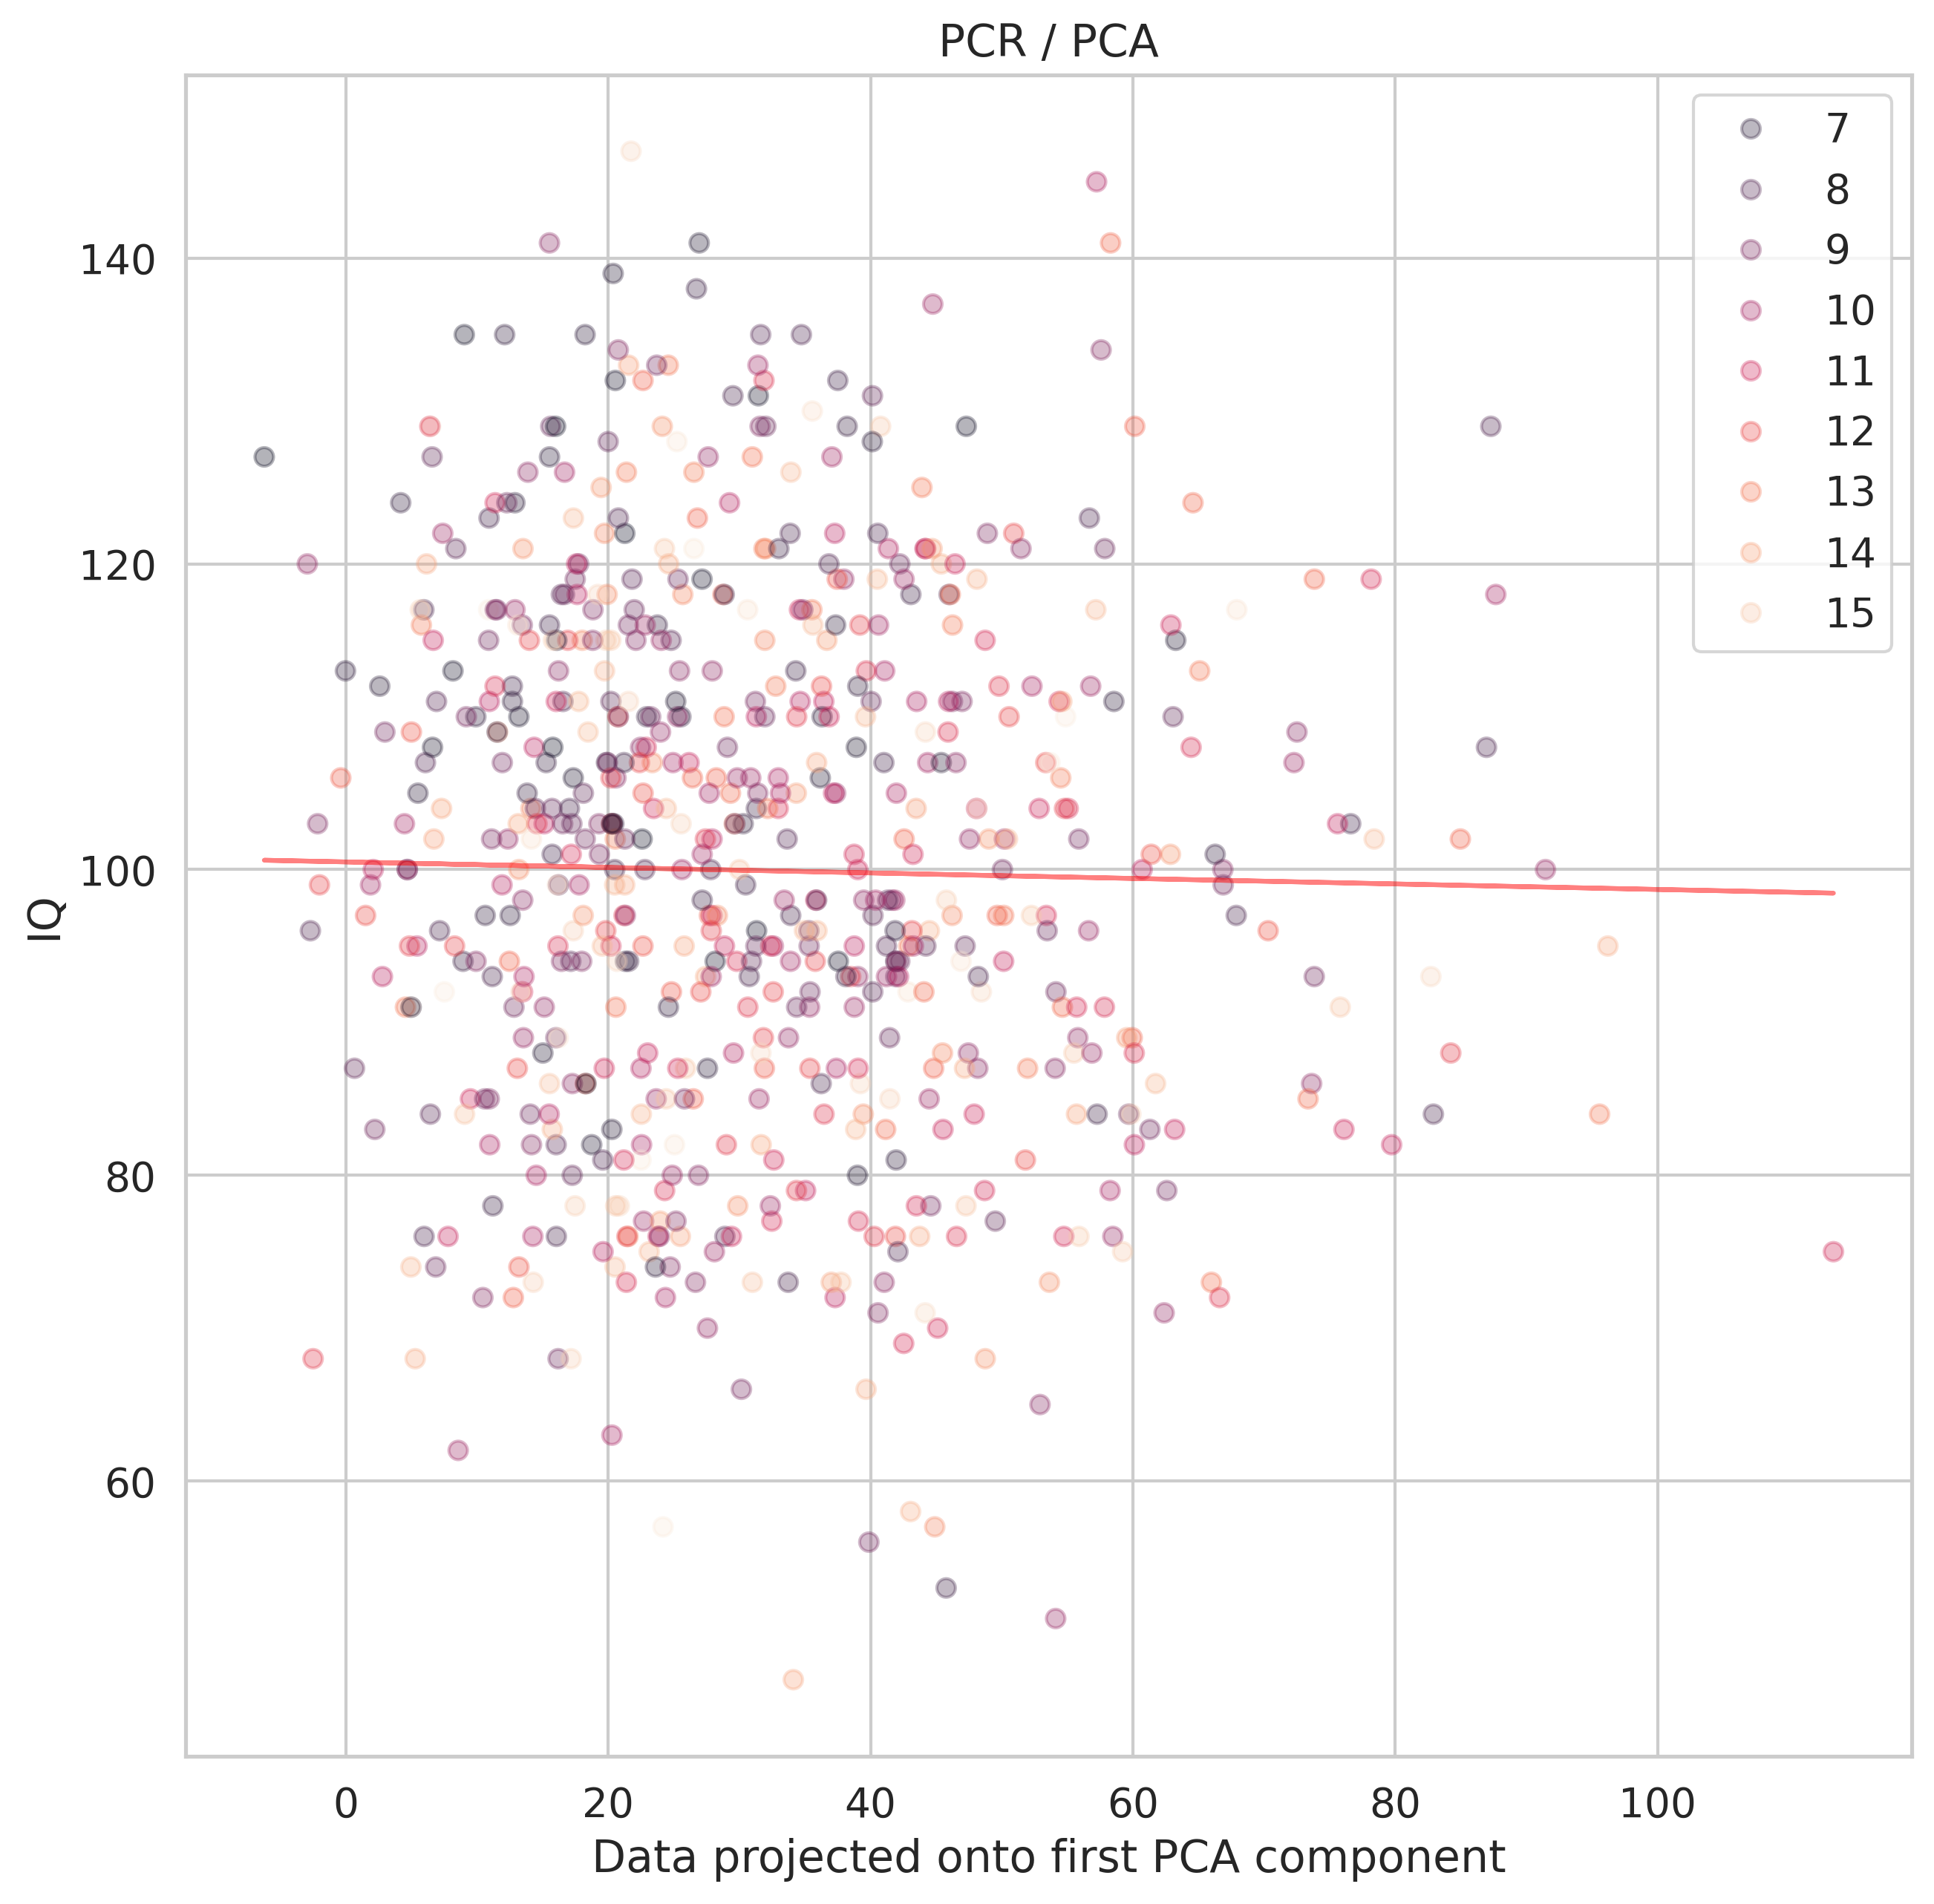

In [40]:
scatter = plt.scatter(X_pca, y, c=ages, alpha=0.3, label='Ground Truth')
plt.plot(X_pca, y_pcr_pred, alpha=0.5, color='red', label="Predictions")
plt.title("PCR / PCA")
plt.xlabel('Data projected onto first PCA component')
plt.ylabel('IQ')
plt.legend(*scatter.legend_elements())
plt.show()

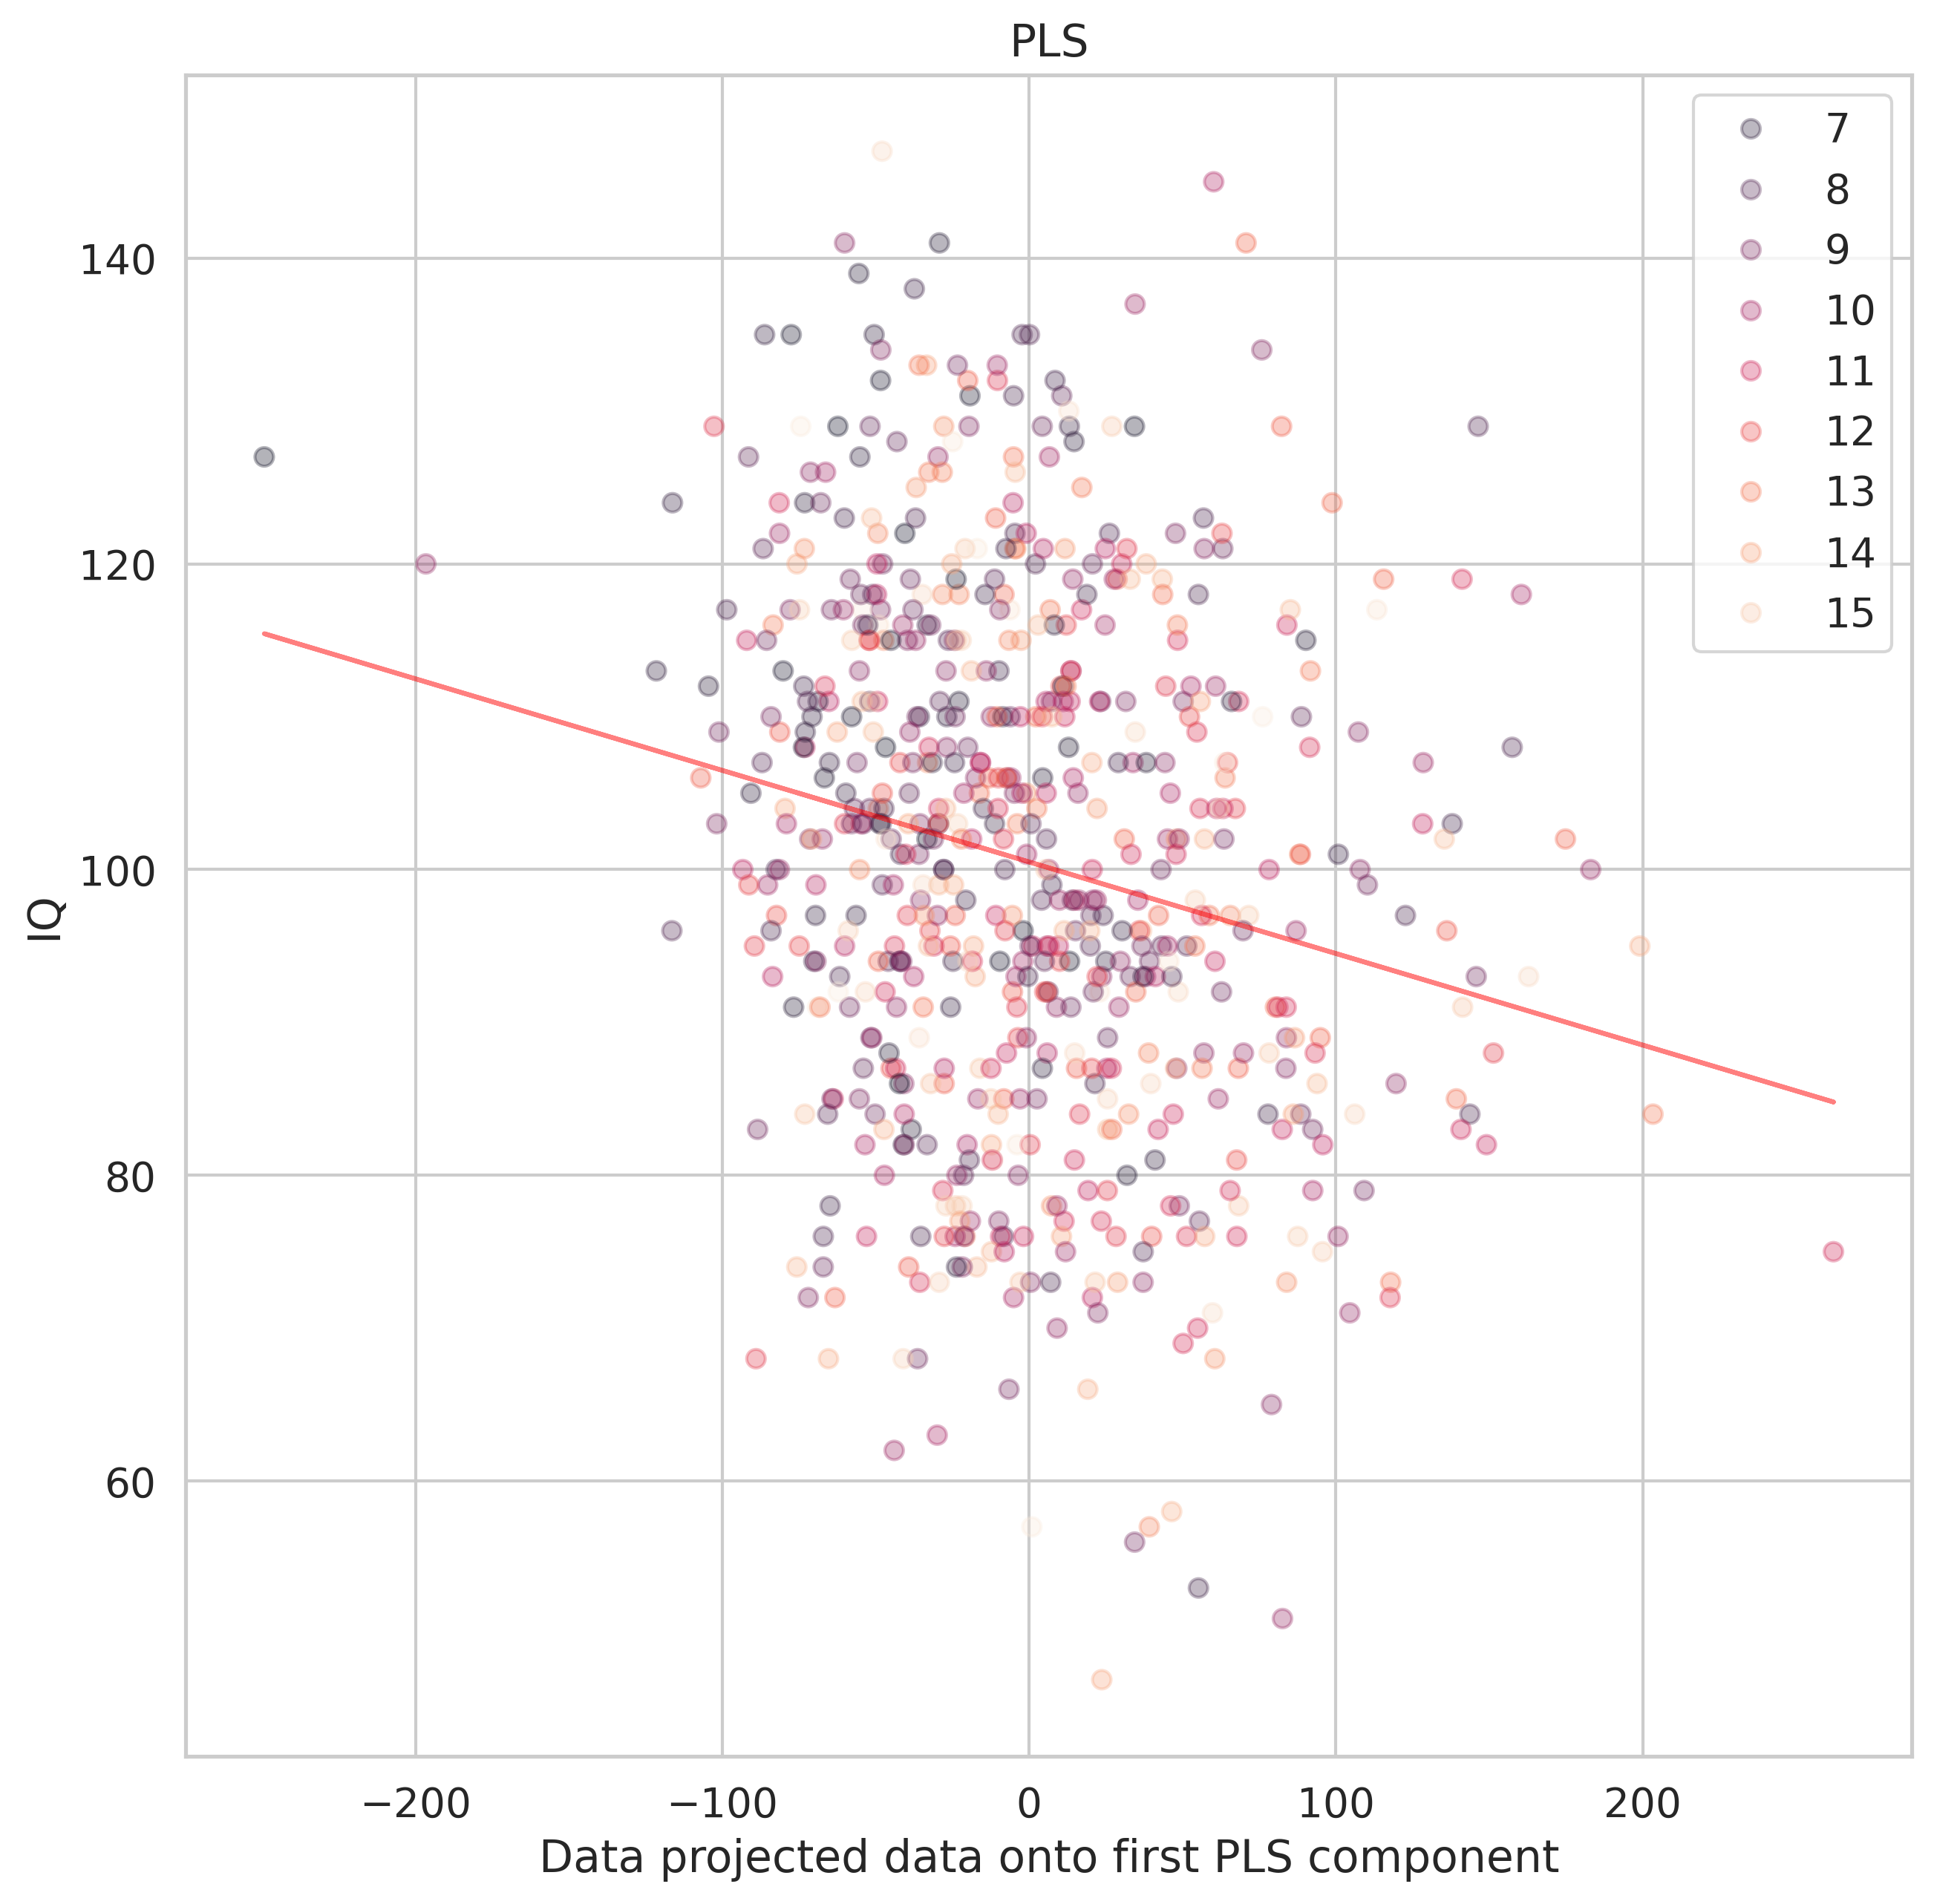

In [39]:
plt.scatter(X_pls, y, c=ages, alpha=0.3, label='Ground Truth')
plt.plot(X_pls, y_pls_pred, alpha=0.5, color='red', label="Predictions")
plt.title("PLS")
plt.xlabel('Data projected data onto first PLS component')
plt.ylabel('IQ')
plt.legend(*scatter.legend_elements())
plt.show()

## Feature Selection

In [10]:
from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, chi2, mutual_info_regression)

In [14]:
var_thres = VarianceThreshold(threshold=0.1)
X_var_thres = var_thres.fit_transform(X)

print(X_var_thres.shape)

(678, 4)


In [15]:
reg = LinearRegression().fit(X_var_thres, y)
y_var_thres = reg.predict(X_var_thres)

print("LR w/ Variance Threshold:", reg.score(X_var_thres, y))

LR w/ Variance Threshold: 0.017010818597368527


In [ ]:
plt.figure(1, figsize=(10, 10))
scatter = plt.scatter(X_var_thres, y, c=ages, alpha=0.3, label='Ground Truth')
plt.plot(X_var_thres, y_var_thres, alpha=0.5, color='red', label="Predictions")
plt.title("Variance Threshold")
plt.xlabel('Feature with highest variance')
plt.ylabel('IQ')
plt.legend(*scatter.legend_elements())
plt.show()

In [51]:
X_mutual_info = SelectKBest(mutual_info_regression, k=1).fit_transform(X, y)

print(X_mutual_info.shape)

(577, 1)


In [52]:
reg = LinearRegression().fit(X_mutual_info, y)
y_mutual_info = reg.predict(X_mutual_info)

print("LR w/ Mutual Information:", reg.score(X_mutual_info, y))

LR w/ Mutual Information: 0.00016105738862803864


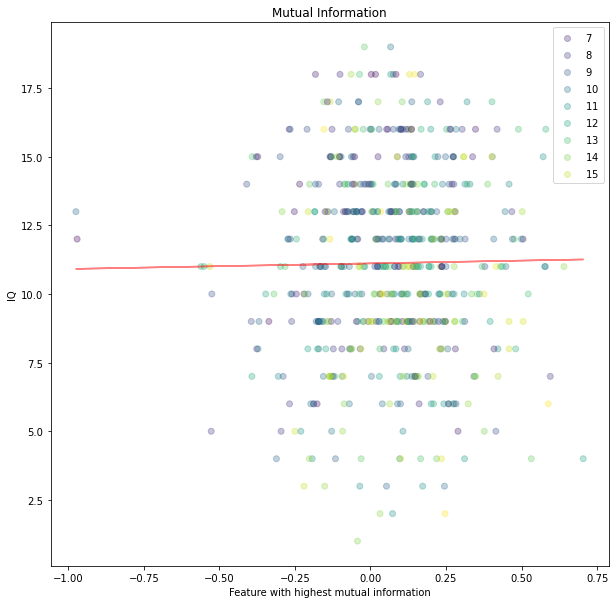

In [54]:
plt.figure(1, figsize=(10, 10))
scatter = plt.scatter(X_mutual_info, y, c=ages, alpha=0.3, label='Ground Truth')
plt.plot(X_mutual_info, y_mutual_info, alpha=0.5, color='red', label="Predictions")
plt.title("Mutual Information")
plt.xlabel('Feature with highest mutual information')
plt.ylabel('IQ') 
plt.legend(*scatter.legend_elements())
plt.show()

## Regression Between FC Variance and IQ

In [28]:
X_var = np.var(X, axis=1, ddof=1).reshape(-1, 1)
y_var = y.reshape(-1, 1)

print(X_var.shape, y_var.shape)

(678, 1) (678, 1)


Lin Reg Score: 0.0028667153931749567


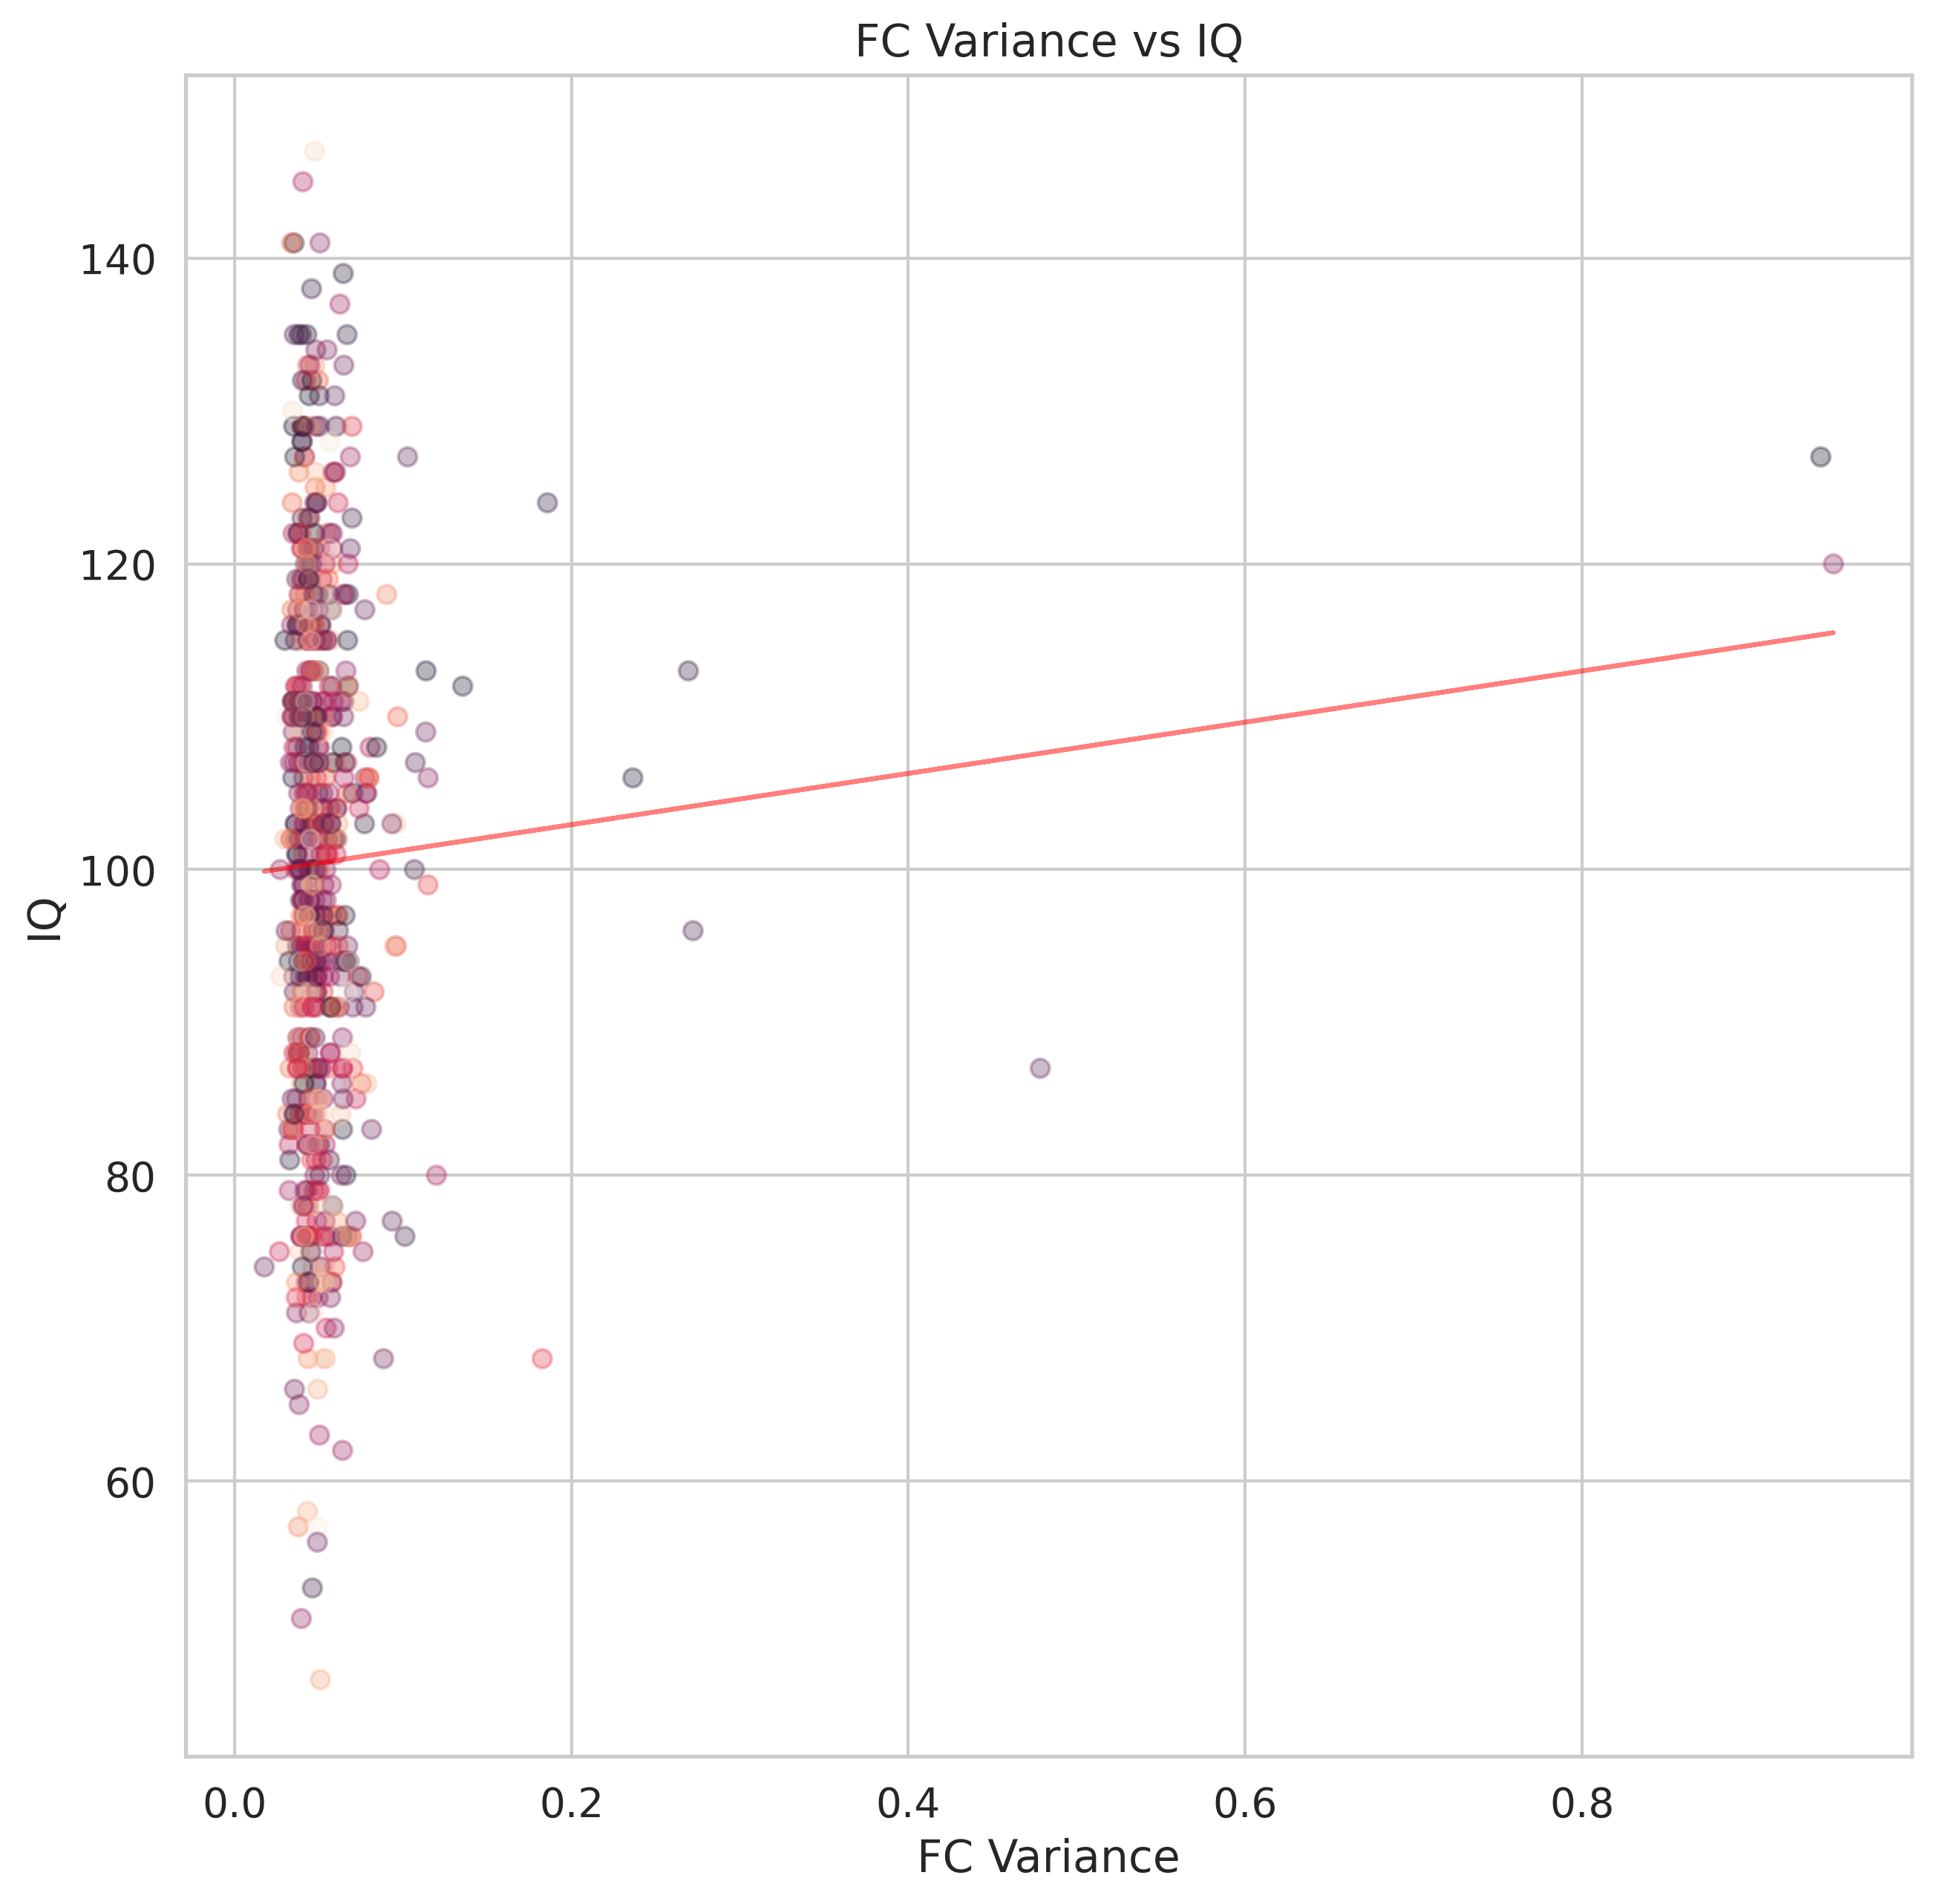

In [41]:
reg = LinearRegression().fit(X_var, y_var)
y_var_pred = reg.predict(X_var)
print(f'Lin Reg Score: {reg.score(X_var, y_var)}')

plt.scatter(X_var, y_var, c=ages, alpha=0.3, label='Ground Truth')
plt.plot(X_var, y_var_pred, alpha=0.5, color='red', label="Predictions")
plt.title("FC Variance vs IQ")
plt.xlabel('FC Variance')
plt.ylabel('IQ')
plt.show()